In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
#BERT
import torch
import pandas as pd
from transformers import BertTokenizer, BertModel,BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
#XGB
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

ENGLISH_STOPWORDS = stopwords.words('english')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
dataset_path = '/content/gdrive/MyDrive/Dataset/amazon-100k.csv'
dataset = pd.read_csv(dataset_path).sample(30000)

#XGBOOST

In [ ]:
dataset['label'] = dataset['label'] - 1
review=dataset[['text','label']]
review.head()

,text,label
98409,Deluo makes great products. And for this price...,1
15806,I just brewed my first pot and I am extremely ...,0
28176,Can't comment on the quality of the product si...,1
70796,Everyone in America needs to read this. Hillma...,1
2434,I was looking for a VBScript book to help me g...,0


In [ ]:
def preprocess_review_text(review):
    # to convert all the characters of the review into lower case alphabets
    review = review.lower()

    # Remove urls from the reviews
    review = re.sub(r"http\S+|www\S+|https\S+", '', review, flags=re.MULTILINE)

    # Remove user related references from the reviews
    review = re.sub(r'\@\w+|\#','', review)

    # Remove punctuations from the reviews
    review = review.translate(str.maketrans('', '', string.punctuation))

    # Remove stopwords from the reviews
    review_tokens = word_tokenize(review)
    filtered_words = [w for w in review_tokens if not w in ENGLISH_STOPWORDS]
    lemmatizer = WordNetLemmatizer()
    filtered_words = [lemmatizer.lemmatize(w) for w in filtered_words]

    joined_text = " ".join(filtered_words)

    return joined_text

def get_feature_vector(train_fit):
    vector = TfidfVectorizer(sublinear_tf=True)
    vector.fit(train_fit)
    return vector

In [ ]:
temp = review['text'].astype(str)
processed_text = temp.apply(preprocess_review_text)
print("Processed text :: \n\n", processed_text)

Processed text :: 

 98409    deluo make great product price cant ask moreth...
15806    brewed first pot extremely dissapointed check ...
28176    cant comment quality product since havent open...
70796    everyone america need read hillman shine brigh...
2434     looking vbscript book help get started book no...
                               ...                        
44049    tim buckley richard thompson knew drag barge e...
71038    several pair completely cute cheap rain bootsa...
11016    trying find movie 2 year reading review dvd re...
69229    purchased player year ago 4th one returned fir...
76904    youre looking everyone trump others bad situat...
Name: text, Length: 30000, dtype: object


In [ ]:
tf_vector = get_feature_vector(np.array(processed_text).ravel())
X = tf_vector.transform(np.array(processed_text).ravel())
y = np.array(review["label"]).ravel()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = XGBClassifier()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Accuracy Score: ", accuracy_score(y_test, y_predict) * 100)

Accuracy Score:  80.88333333333333


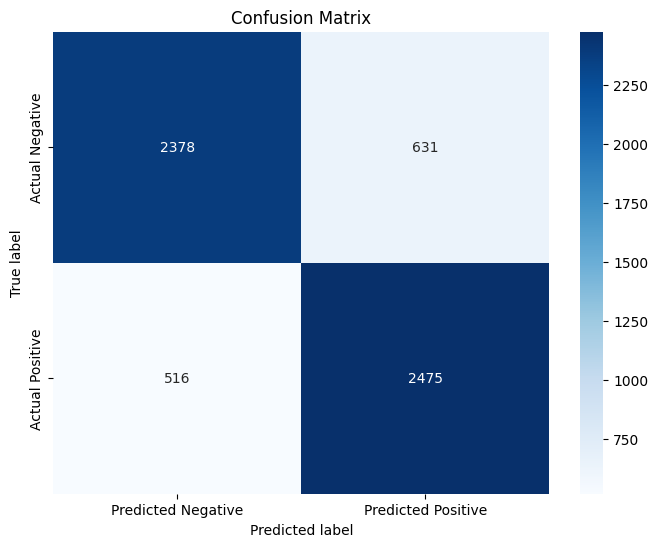

In [ ]:
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      3009
           1       0.80      0.83      0.81      2991

    accuracy                           0.81      6000
   macro avg       0.81      0.81      0.81      6000
weighted avg       0.81      0.81      0.81      6000



#BERT

In [ ]:
# Load pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
# tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
# model = BertForSequenceClassification.from_pretrained("bert-base-uncased")
# model = BertModel.from_pretrained("bert-base-uncased")
# model = TFBertModel.from_pretrained("bert-base-uncased")
tokenizer = BertTokenizer.from_pretrained(model_name, cache_dir="./bert_cache")
model = BertForSequenceClassification.from_pretrained(model_name, cache_dir="./bert_cache")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Map numerical sentiment values to labels
dataset['sentiment'] = dataset['label']

In [ ]:
dataset['text']

98409    Deluo makes great products. And for this price...
15806    I just brewed my first pot and I am extremely ...
28176    Can't comment on the quality of the product si...
70796    Everyone in America needs to read this. Hillma...
2434     I was looking for a VBScript book to help me g...
                               ...                        
44049    Tim Buckley and Richard Thompson knew how to d...
71038    After several pairs of completely cute (and ch...
11016    I have been trying to find this movie for 2 ye...
69229    I purchased this player a year ago. I am on my...
76904    If you're looking for everyone to trump each o...
Name: text, Length: 30000, dtype: object

In [ ]:
# Tokenize and preprocess the text data
max_length = 100  
tokenized_texts = [tokenizer.encode(text, add_special_tokens=True, max_length=max_length, truncation=True, padding='max_length') for text in dataset['text']]
input_ids = torch.tensor(tokenized_texts)
labels = torch.tensor(dataset['sentiment'].values)

In [ ]:
# Split the dataset into train and test sets
train_inputs, test_inputs, train_labels, test_labels = train_test_split(input_ids, labels, test_size=0.2, random_state=42)
train_masks = (train_inputs != tokenizer.pad_token_id).type(torch.float32)
test_masks = (test_inputs != tokenizer.pad_token_id).type(torch.float32)

In [ ]:
# Create DataLoader objects for training and testing
batch_size = 32 
train_data = TensorDataset(train_inputs, train_masks, train_labels)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_data = TensorDataset(test_inputs, test_masks, test_labels)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

In [ ]:
# Fine-tune the BERT model
optimizer = AdamW(model.parameters(), lr=2e-5) 
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

epochs = 15 
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        batch = tuple(t.to(device) for t in batch)
        inputs, masks, labels = batch
        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=masks, labels=labels)
        loss = outputs.loss
        total_loss += loss.item()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch + 1}/{epochs}, Loss: {total_loss}")

Epoch 1/15, Loss: 70.04493649071082
Epoch 2/15, Loss: 34.93733474437613
Epoch 3/15, Loss: 22.31381867430173
Epoch 4/15, Loss: 16.25003404536983
Epoch 5/15, Loss: 12.720408688430325
Epoch 6/15, Loss: 10.894651915761642
Epoch 7/15, Loss: 7.781800427452254
Epoch 8/15, Loss: 9.248555312187818
Epoch 9/15, Loss: 7.585082405639696
Epoch 10/15, Loss: 6.292555887277558
Epoch 11/15, Loss: 7.587588468612012
Epoch 12/15, Loss: 6.995392383178114
Epoch 13/15, Loss: 5.3401135528856685
Epoch 14/15, Loss: 6.8183457715276745
Epoch 15/15, Loss: 5.629161922881394


In [ ]:
# Evaluate the fine-tuned model on the test set
model.eval()
predictions = []
true_labels = []
for batch in test_loader:
    batch = tuple(t.to(device) for t in batch)
    inputs, masks, labels = batch
    with torch.no_grad():
        outputs = model(inputs, attention_mask=masks)
    logits = outputs.logits
    predicted_labels = torch.argmax(logits, dim=1).cpu().numpy()
    predictions.extend(predicted_labels)
    true_labels.extend(labels.cpu().numpy())

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(true_labels, predictions)
print(f"Test Accuracy: {accuracy}")

Test Accuracy: 0.917


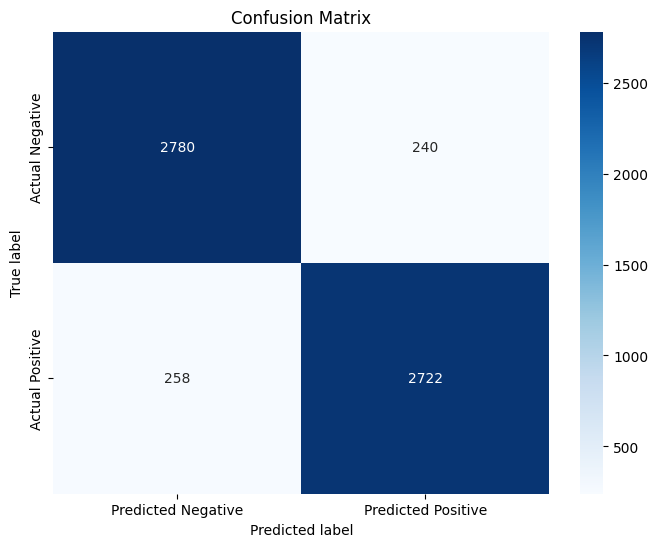

In [ ]:
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(true_labels, predictions))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3020
           1       0.92      0.91      0.92      2980

    accuracy                           0.92      6000
   macro avg       0.92      0.92      0.92      6000
weighted avg       0.92      0.92      0.92      6000



In [ ]:
predict  = pd.DataFrame(predictions)
ytest = pd.DataFrame(true_labels)
resultant = pd.concat([predict, ytest], axis=1)

In [ ]:
resultant.columns=['Predicted_values','Actual_values']
resultant.head()

,Predicted_values,Actual_values
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0


In [ ]:
predict.to_csv('predictions.csv', index=False)

In [ ]:
ytest.to_csv('y_true.csv', index=False)

In [ ]:
# Use the fine-tuned model for inference on new reviews
def predict_sentiment(review_text):
    model.eval()
    tokenized_text = tokenizer.encode(review_text, add_special_tokens=True, max_length=max_length, truncation=True)
    input_ids = torch.tensor(tokenized_text).unsqueeze(0).to(device)
    mask = (input_ids != tokenizer.pad_token_id).type(torch.float32)
    with torch.no_grad():
        output = model(input_ids, attention_mask=mask)
    logits = output.logits
    predicted_label = torch.argmax(logits, dim=1).item()
    sentiment = "positive" if predicted_label == 1 else "negative"
    return sentiment

In [ ]:
# Example usage for inference
new_review = "This product is amazing! I love it."
predicted_sentiment = predict_sentiment(new_review)
print(f"Predicted Sentiment: {predicted_sentiment}")

Predicted Sentiment: positive


In [ ]:
# while(True):
#   continue